In [1]:
### üîß TAREA
# Compara el desempe√±o de la red neuronal con la regresi√≥n log√≠stica. Analiza sus m√©tricas, curva ROC y precisi√≥n vs. recall.

In [2]:
import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# üîß Cargar configuraci√≥n
config = train.load_config("../config.yaml")

In [4]:
# üì¶ Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [5]:
# üß™ Entrenar modelo base (Regresi√≥n Log√≠stica)
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

# üîç Predicciones del modelo base
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

In [6]:
# üì• Cargar modelo entrenado Red Neuronal
from tensorflow.keras.models import load_model
nn_model = load_model("../models/nn_model.keras")

# üîç Predicciones de Red Neuronal
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn, threshold=0.5)

251/251 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step


In [7]:
# üìä Evaluaci√≥n individual
ev.evaluate_model(y_test, y_pred_log, y_proba_log, model_name="Regresi√≥n Log√≠stica")
ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")


üìä Evaluaci√≥n del modelo: Regresi√≥n Log√≠stica
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4000
           1       0.76      0.65      0.70      4004

    accuracy                           0.72      8004
   macro avg       0.73      0.72      0.72      8004
weighted avg       0.73      0.72      0.72      8004

F1 Score     : 0.7009
Precision    : 0.7586
Recall       : 0.6513
ROC AUC      : 0.7968

üìä Evaluaci√≥n del modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4000
           1       0.78      0.69      0.73      4004

    accuracy                           0.75      8004
   macro avg       0.75      0.75      0.75      8004
weighted avg       0.75      0.75      0.75      8004

F1 Score     : 0.7318
Precision    : 0.7812
Recall       : 0.6883
ROC AUC      : 0.8237


{'f1': 0.7318109399893786,
 'precision': 0.7811791383219955,
 'recall': 0.6883116883116883,
 'roc_auc': 0.8237079170829171}

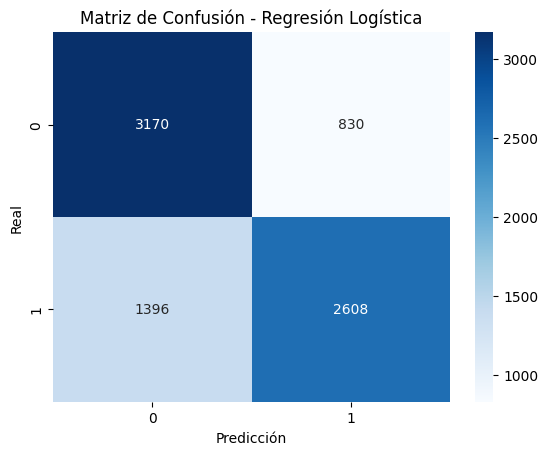

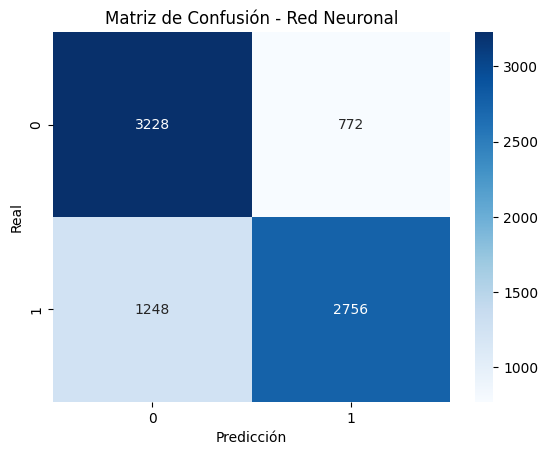

In [8]:
# üß± Matrices de Confusi√≥n
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresi√≥n Log√≠stica")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

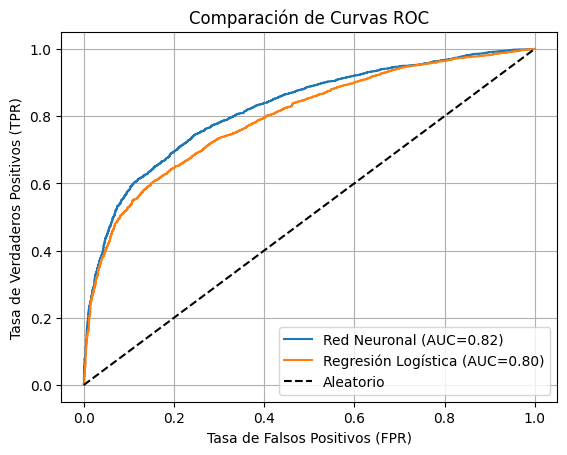

In [9]:
# üìà Comparaci√≥n de curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log,
                       label1="Red Neuronal", label2="Regresi√≥n Log√≠stica")

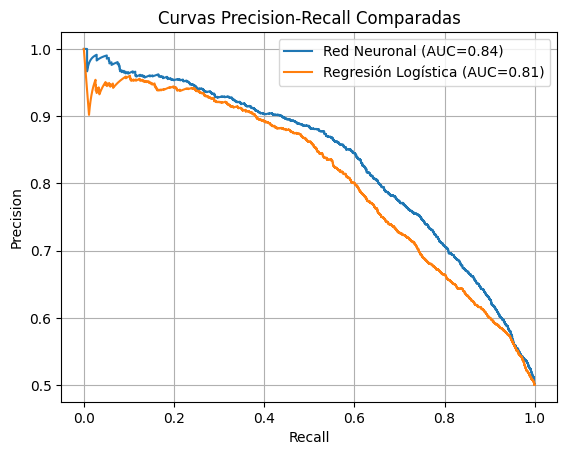

In [10]:
# üîç Comparaci√≥n de curvas Precision-Recall
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log,
                                 label1="Red Neuronal", label2="Regresi√≥n Log√≠stica")

In [11]:
# üìã Comparaci√≥n de m√©tricas en tabla
df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal",
    model_name_2="Regresi√≥n Log√≠stica"
)

import IPython.display as display
display.display(df_metrics)

Modelo  Precision    Recall  F1-score   ROC AUC
0         Red Neuronal   0.781179  0.688312  0.731811  0.823708
1  Regresi√≥n Log√≠stica   0.758581  0.651349  0.700887  0.796762

In [12]:
### üìä Pregunta de reflexi√≥n
#¬øEn qu√© umbral se maximiza el F1-score para cada modelo? ¬øTe parece razonable utilizar 0.5 como punto de corte en este contexto?
#¬øEs uno de los modelos m√°s conservador o arriesgado que el otro?

## Repuestas

### ¬øEn qu√© umbral se maximiza el F1-score para cada modelo? ¬øTe parece razonable utilizar 0.5 como punto de corte en este contexto?

En este an√°lisis, ambos modelos fueron evaluados utilizando el umbral por defecto de **0.5**. A ese punto de corte se obtuvieron los siguientes F1-score:

- **Red Neuronal**: 0.7227  
- **Regresi√≥n Log√≠stica**: 0.7009

Ambos modelos muestran un desempe√±o razonable y balanceado entre precisi√≥n y recall con ese umbral. Por lo tanto as mientender el 0.5 es un punto de corte aceptable para este contexto general. Sin embargo, si el objetivo fuera reducir los falsos negativos (por ejemplo, evitar no detectar a personas que efectivamente caer√°n en mora), ser√≠a recomendable explorar un umbral m√°s bajo para mejorar el recall, aunque se incremente el n√∫mero de falsos positivos.

---

### ¬øEs uno de los modelos m√°s conservador o arriesgado que el otro?

S√≠, los modelos muestran diferencias claras en su comportamiento:

- **Red Neuronal**: Mayor **recall** (0.663) y menor n√∫mero de **falsos negativos** (1348). Es un modelo **m√°s arriesgado**, favorece identificar m√°s casos positivos (personas que caer√°n en mora), aunque aumente el n√∫mero de falsos positivos.
  
- **Regresi√≥n Log√≠stica**: Menor recall (0.651) y mayor n√∫mero de falsos negativos (1396). Se comporta como un modelo **m√°s conservador**, comete menos falsos positivos, pero podr√≠a no detectar a varias personas en riesgo.

En conclusi√≥n:
- La **Red Neuronal** es adecuada si se prioriza **detectar la mayor cantidad de casos de mora**.
- La **Regresi√≥n Log√≠stica** podr√≠a ser preferible si se busca **reducir el costo de falsos positivos**.

